In [1]:
import torch

import torch.nn as nn

from torchvision import transforms
from torch.utils.data import DataLoader
import torch.optim as optim

from train_functions import get_data, train_model, check
from utils import plot_loss
from custom_loss import CustomLoss

from DE_NoSkip import DE_gio_noskip

In [2]:
H, W = 128, 128
BATCH_SIZE = 64
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"


train_transf = transforms.Compose([transforms.RandomRotation(degrees=5),
    transforms.RandomCrop(480), 
    transforms.ColorJitter(brightness = [0.8,1.2]),
    transforms.Resize((H, W)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()]
)

test_transf = transforms.Compose([transforms.Resize((H, W)),
                             transforms.ToTensor()])

train_dataset, test_dataset = get_data(reduced=True, train_transformation=train_transf, test_transformation=test_transf)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


print("The device is: ", DEVICE)
print("Number of train images: ", len(train_dataset))
print("Number of test images: ", len(test_dataset))
print("Image shape:", train_dataset[0][0].shape)
print("Mask shape:", train_dataset[0][1].shape)

The device is:  cuda
Number of train images:  1111
Number of test images:  338
Image shape: torch.Size([3, 128, 128])
Mask shape: torch.Size([1, 128, 128])


In [3]:
model = DE_gio_noskip()

criterion = nn.L1Loss()
scores = [criterion, nn.MSELoss(), CustomLoss("Custom2")]
optimizer = optim.Adam(model.parameters())

num_epochs = 50

/anaconda/envs/azureml_py38_PT_and_TF/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_and_TF/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
trained_model, predictions, train_loss, test_loss = train_model(model, train_loader, 
                                                               test_loader, num_epochs, DEVICE, criterion, scores, optimizer, 
                                                               start_epoch=0)#2, train_loss=train_loss, test_loss=test_loss)

Batch [1/18], Loss: 0.3401
Batch [2/18], Loss: 0.3295
Batch [3/18], Loss: 0.3121
Batch [4/18], Loss: 0.3278
Batch [5/18], Loss: 0.2757
Batch [6/18], Loss: 0.2636
Batch [7/18], Loss: 0.2405
Batch [8/18], Loss: 0.2182
Batch [9/18], Loss: 0.2048
Batch [10/18], Loss: 0.2162
Batch [11/18], Loss: 0.1875
Batch [12/18], Loss: 0.1884
Batch [13/18], Loss: 0.1681
Batch [14/18], Loss: 0.1776
Batch [15/18], Loss: 0.1738
Batch [16/18], Loss: 0.1733
Batch [17/18], Loss: 0.1700
Batch [18/18], Loss: 0.1633
Epoch [1/50], Train Loss: 0.2295
Test Loss: L1Loss(): 0.3445; MSELoss(): 0.1641; CustomLoss(): 0.3770
Batch [1/18], Loss: 0.1682
Batch [2/18], Loss: 0.1754
Batch [3/18], Loss: 0.1466
Batch [4/18], Loss: 0.1469
Batch [5/18], Loss: 0.1583
Batch [6/18], Loss: 0.1578
Batch [7/18], Loss: 0.1552
Batch [8/18], Loss: 0.1371
Batch [9/18], Loss: 0.1579
Batch [10/18], Loss: 0.1434
Batch [11/18], Loss: 0.1396
Batch [12/18], Loss: 0.1333
Batch [13/18], Loss: 0.1471
Batch [14/18], Loss: 0.1382
Batch [15/18], Loss:

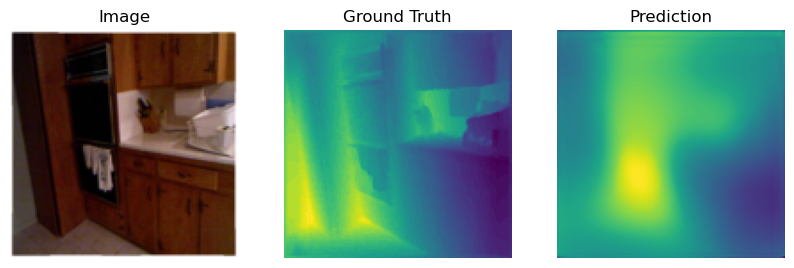

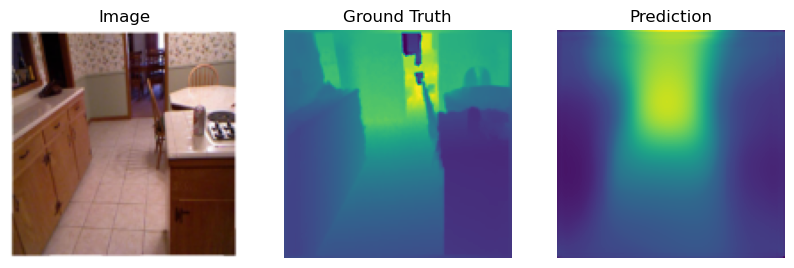

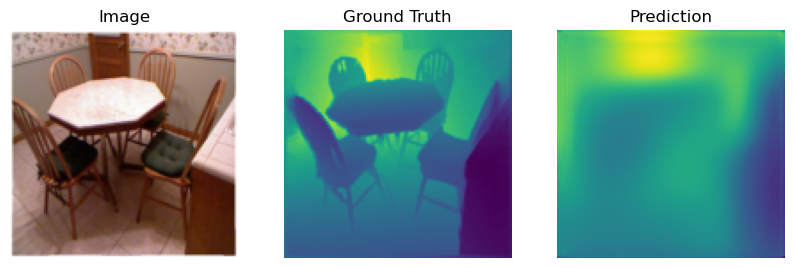

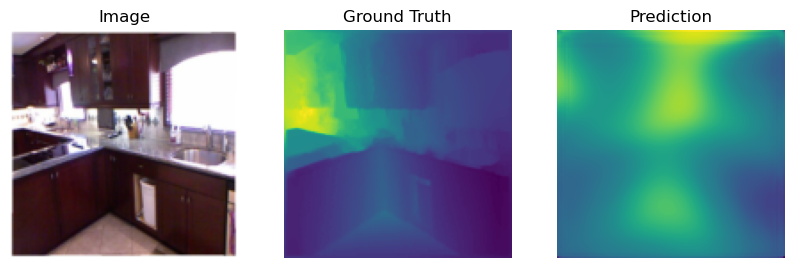

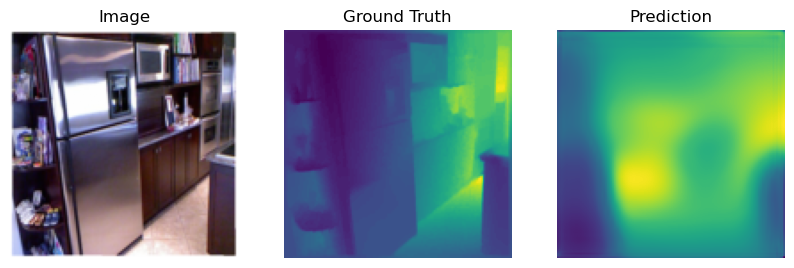

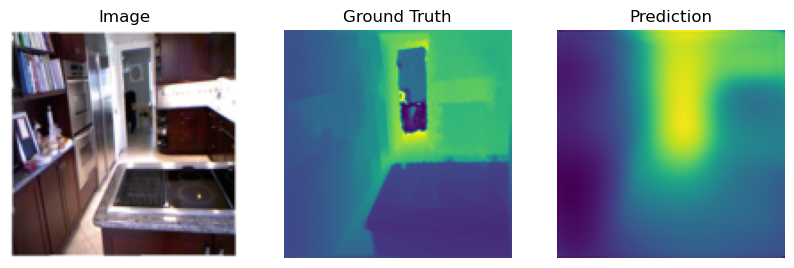

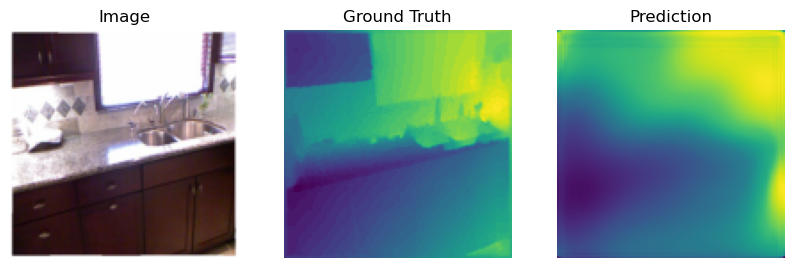

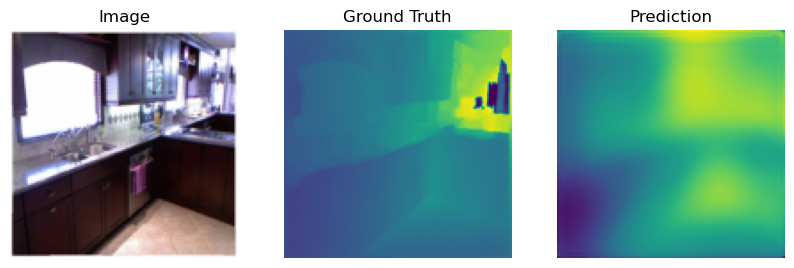

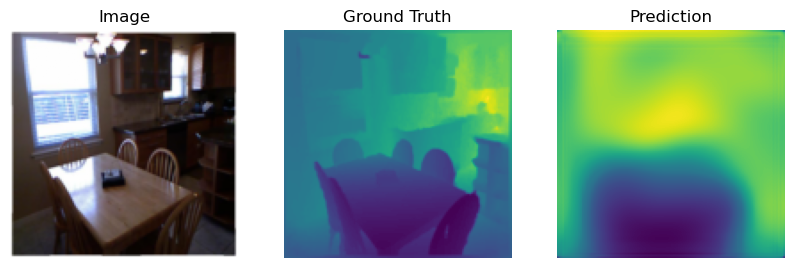

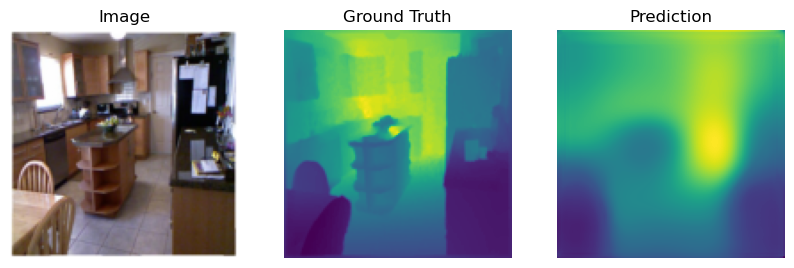

In [5]:
for i in range(10):
    image, mask  = test_dataset[i][0], test_dataset[i][1]
    prediction = predictions[i]
    check(image, mask, prediction)

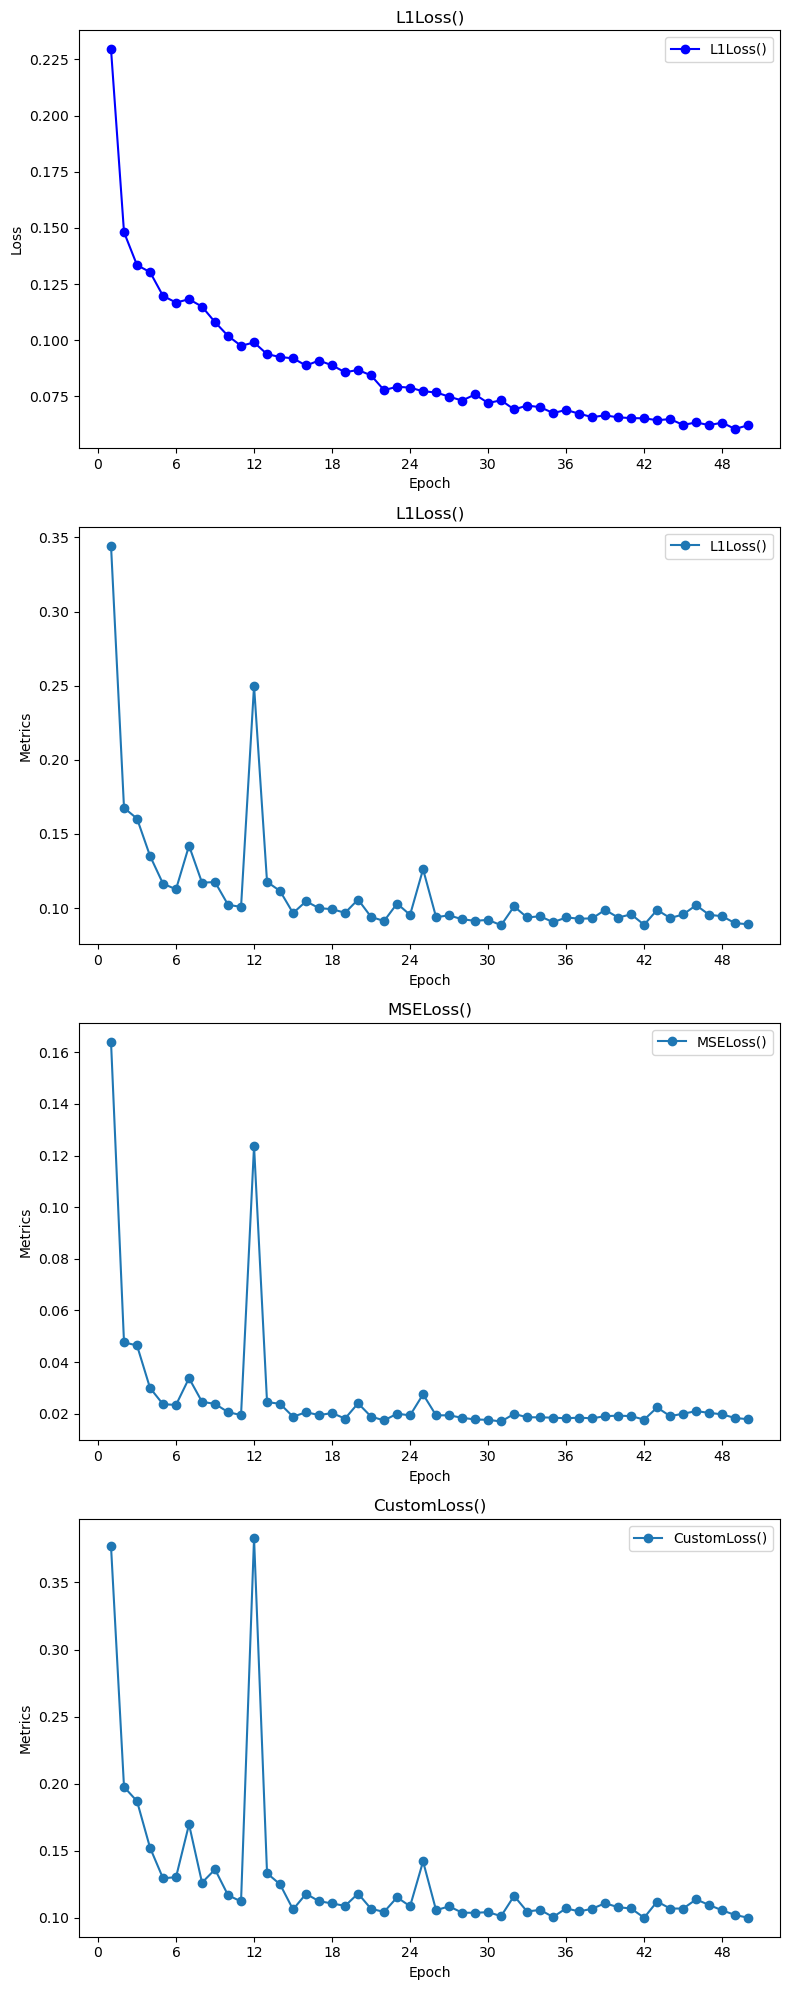

: 

In [6]:
plot_loss(train_loss, test_loss, scores)